<a href="https://colab.research.google.com/github/raghurammanikanta/WORK-ON-TELUGU-DATA/blob/main/EDA_for_sentiment_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing the libraries we need***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# *Loading the dataset*



In [ ]:
df=pd.read_excel('/content/drive/MyDrive/merged_dataset.xlsx')

In [ ]:
df.head()

,Sentence,Emotion,Tokens
0,డ్రెస్సింగ్ విషయంలో సెలబ్రిటీలను బయటివాళ్లూ అన...,no,NaN
1,అయితే ప్ర‌భుదాస్ వైష్ణాని అనే వ్య‌క్తి క‌స్ట‌డ...,sad,NaN
2,"విజయ్ ఆంటోని, యాక్షన్‌కింగ్ అర్జున్ కలిసి నటిస...",no,NaN
3,ఆయన 2019 ఎన్నికల్లో టీడీపీ సిట్టింగ్ ఎమ్మెల్యే...,happy,NaN
4,"రెండోసారి ప్రధాని అయిన నరేంద్రమోదీకి, ఏపీలో వి...",happy,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52708 entries, 0 to 52707
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  52708 non-null  object
 1   Emotion   52708 non-null  object
 2   Tokens    24599 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Sentence,Emotion,Tokens
count,52708,52708,24599
unique,28026,5,24533
top,పోలీసుల కథనం ప్రకారం.\n,no,"['నిర్మాణ', 'విలువలు', 'బాగున్నాయి', '.']"
freq,6,38193,5


# ***Analyze the distribution of emotions:***

This figure illustrates the distribution of various emotions present in the dataset. The data is visualized using a count plot, which displays the frequency of each emotion category. The x-axis represents the different emotions, while the y-axis shows the count of occurrences for each emotion. The plot is color-coded using the 'viridis' palette, enhancing visual differentiation between the emotion categories. The figure is designed with a 45-degree rotation for the x-axis labels to improve readability. The plot was generated with a resolution of 1200 dpi and saved with tight bounding box adjustments to ensure clarity and optimal presentation in the document.

<ipython-input-22-62ab49430f97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='viridis')


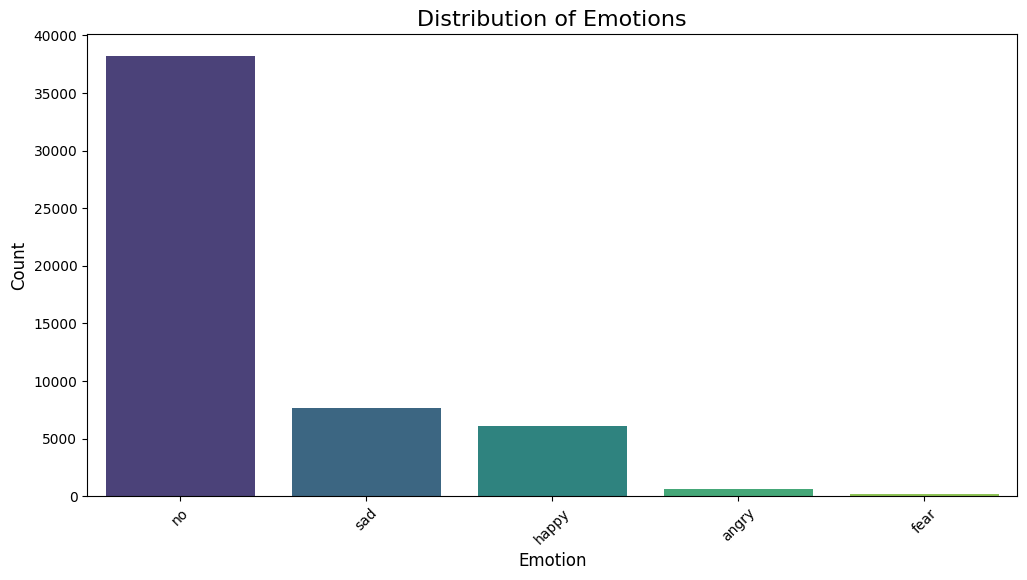

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Emotion', data=df, palette='viridis')
plt.title('Distribution of Emotions', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('Distribution of Emotions.png',dpi=1200,bbox_inches='tight')
plt.show()

# ***Analyze text length***

This figure presents the distribution of sentence lengths within the dataset. The length of each sentence was calculated and stored in the sentence_length column. A histogram was then created to visualize the frequency distribution of these lengths, with a kernel density estimate (KDE) overlay to highlight the distribution's shape more smoothly. The x-axis represents the length of the sentences, while the y-axis shows the count of sentences corresponding to each length. The plot provides a clear view of how sentence lengths vary across the dataset. This visualization is essential for understanding the textual characteristics and variability within the data. The figure was generated with a resolution of 1200 dpi and saved with tight bounding box adjustments to ensure clarity and optimal presentation in the document.

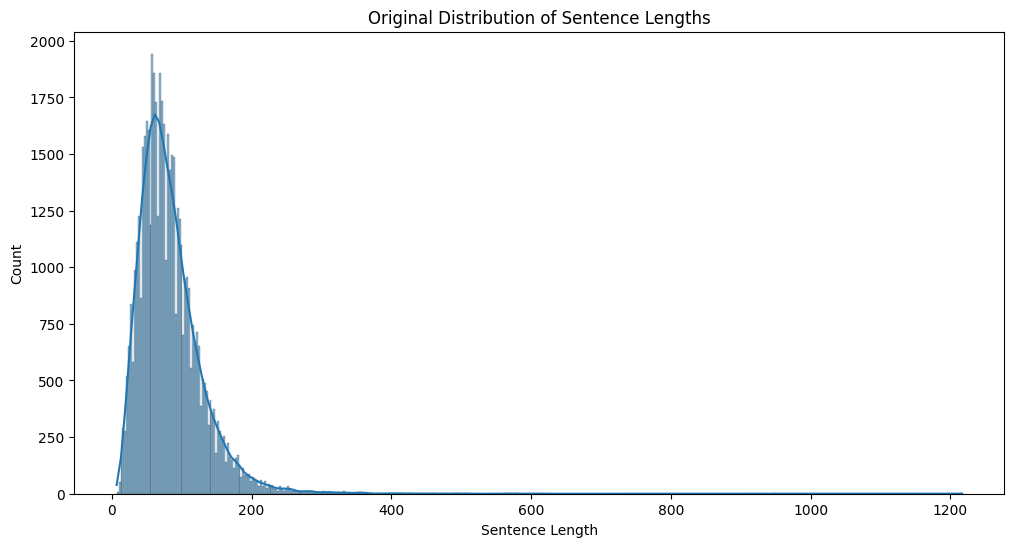

count    52708.000000
mean        83.813387
std         46.073488
min          7.000000
25%         53.000000
50%         75.000000
75%        105.000000
max       1217.000000
Name: sentence_length, dtype: float64


In [ ]:

df['text_length'] = df['Sentence'].str.len()
df['sentence_length'] = df['Sentence'].str.len()

# Plot the original distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentence_length', kde=True)
plt.title('Original Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.savefig('Original Distribution of Sentence Lengths.png',dpi=1200,bbox_inches='tight')
plt.show()

# Get some statistics
print(df['sentence_length'].describe())



Hence we got right skewed we are goona make it into balanced by taking only the required

In [ ]:
cutoff = df['sentence_length'].quantile(0.99)
print(f"95th percentile of sentence length: {cutoff}")

95th percentile of sentence length: 234.0


So,by this cutoff we are gonna cut the required

Now we have the balanced

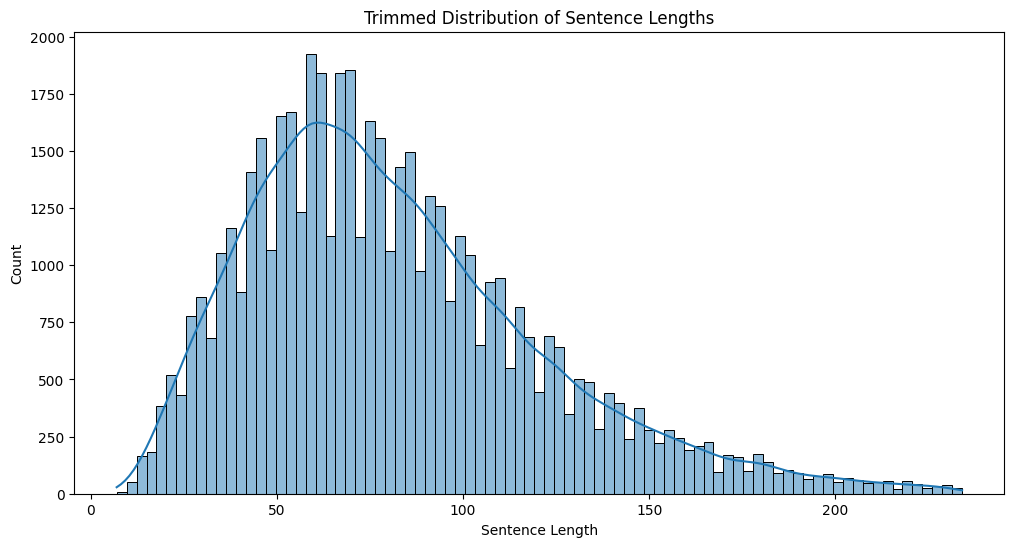

count    52182.000000
mean        81.617186
std         39.580688
min          7.000000
25%         53.000000
50%         75.000000
75%        103.000000
max        234.000000
Name: sentence_length, dtype: float64


In [ ]:
df_trimmed = df[df['sentence_length'] <= cutoff].copy()

# Plot the new distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_trimmed, x='sentence_length', kde=True)
plt.title('Trimmed Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.savefig('Trimmed Distribution of Sentence Lengths.png',dpi=1200,bbox_inches='tight')
plt.show()

# Get some statistics of the trimmed data
print(df_trimmed['sentence_length'].describe())

In [ ]:
df_trimmed.to_csv('trimmed_dataset.csv', index=False)

In [ ]:
da=pd.read_csv('/content/trimmed_dataset.csv')
da.head()

,Sentence,Emotion,Tokens,text_length,sentence_length
0,డ్రెస్సింగ్ విషయంలో సెలబ్రిటీలను బయటివాళ్లూ అన...,no,NaN,166,166
1,అయితే ప్ర‌భుదాస్ వైష్ణాని అనే వ్య‌క్తి క‌స్ట‌డ...,sad,NaN,60,60
2,"విజయ్ ఆంటోని, యాక్షన్‌కింగ్ అర్జున్ కలిసి నటిస...",no,NaN,69,69
3,ఆయన 2019 ఎన్నికల్లో టీడీపీ సిట్టింగ్ ఎమ్మెల్యే...,happy,NaN,110,110
4,"రెండోసారి ప్రధాని అయిన నరేంద్రమోదీకి, ఏపీలో వి...",happy,NaN,108,108


# ***Box plot of text length by emotion***

This figure illustrates the distribution of text lengths across different emotions present in the dataset. The length of each text was calculated and stored in the text_length column. A box plot was then generated to visualize how text lengths vary for each emotion category. The x-axis represents the different emotions, while the y-axis shows the text lengths. Each box plot displays the median, quartiles, and potential outliers for the text lengths within each emotion category, providing a comprehensive view of the central tendency and dispersion of text lengths.

The plot is color-coded using the 'Set3' palette, which enhances visual differentiation between the emotion categories. The figure is designed with a 45-degree rotation for the x-axis labels to improve readability. This visualization is crucial for understanding the relationship between the text length and the expressed emotions, highlighting any significant differences or patterns.

The figure was generated with a resolution of 1200 dpi and saved with tight bounding box adjustments to ensure clarity and optimal presentation in the document.



<ipython-input-28-cb5e0e99b51b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='text_length', data=df, palette='Set3')


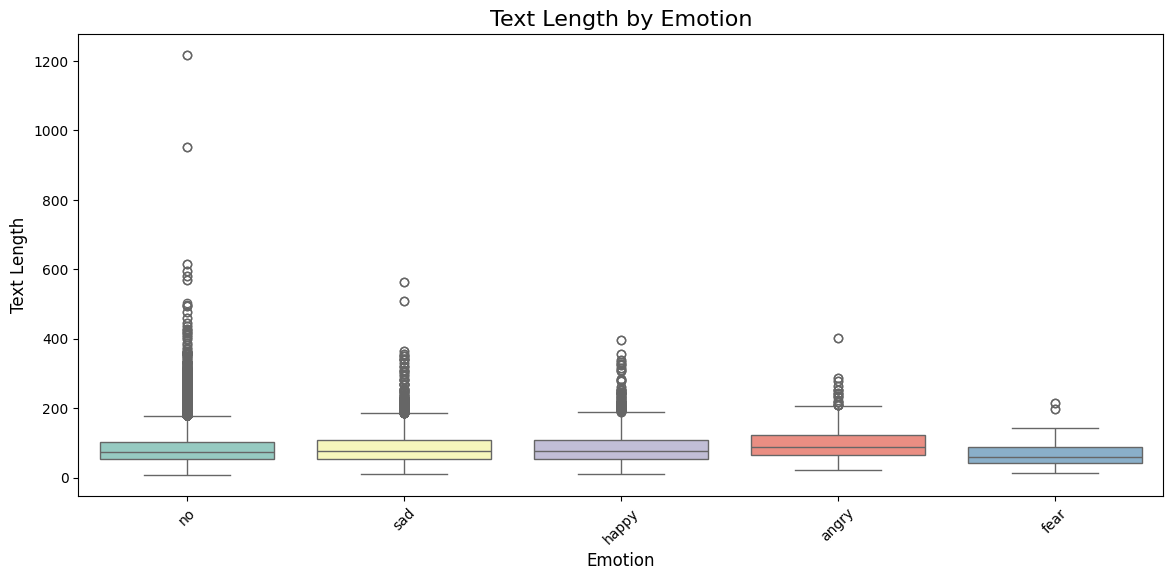

In [ ]:
#for original data
plt.figure(figsize=(14, 6))
sns.boxplot(x='Emotion', y='text_length', data=df, palette='Set3')
plt.title('Text Length by Emotion', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('Text Length by Emotion.png',dpi=1200,bbox_inches='tight')
plt.show()

<ipython-input-29-0b0b69cf51c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='sentence_length', data=da, palette='Set3')


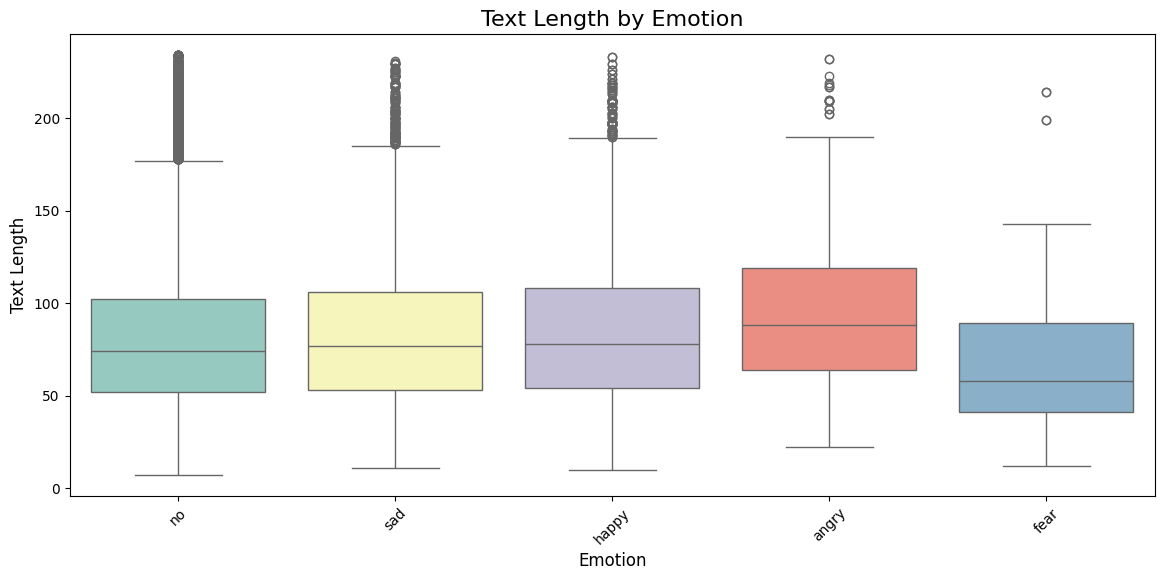

In [ ]:
#for trimmed data
plt.figure(figsize=(14, 6))
sns.boxplot(x='Emotion', y='sentence_length', data=da, palette='Set3')
plt.title('Text Length by Emotion', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('Text Length by Emotion.png',dpi=1200,bbox_inches='tight')
plt.show()

# ***Analyze word count***

This figure presents the distribution of word counts within the dataset. The number of words in each sentence was calculated and stored in the word_count column. A histogram was then created to visualize the frequency distribution of word counts, with a kernel density estimate (KDE) overlay to highlight the distribution's shape more smoothly. The x-axis represents the word count, while the y-axis shows the number of sentences corresponding to each word count. The plot is colored in light green to enhance visual appeal.

This visualization provides a clear view of how word counts vary across the dataset, which is essential for understanding the textual characteristics and variability within the data. The figure was generated with a resolution of 1200 dpi and saved with tight bounding box adjustments to ensure clarity and optimal presentation in the document.

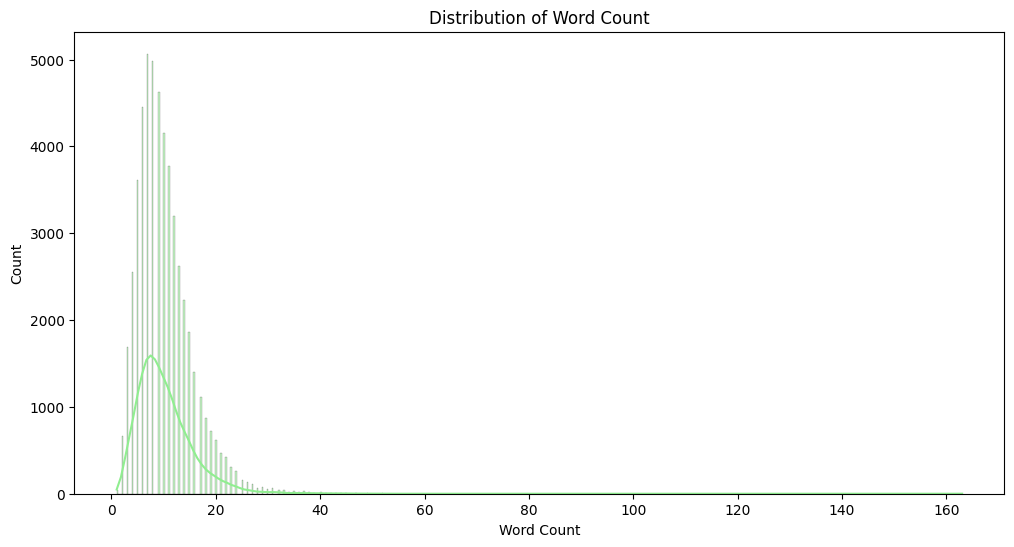

In [ ]:
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], kde=True,color='lightgreen')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.savefig('Distribution of Word Count.png',dpi=1200,bbox_inches='tight')
plt.show()



# ***Analyze most common words***




Top 20 Words and Their Frequencies

This section presents an analysis of the top 20 most frequent words in the Telugu sentences from the dataset. The dataset was loaded from an Excel file, and the column containing Telugu sentences was specified. The words in each sentence were extracted and counted to determine their frequencies.

The following steps were performed:

Data Loading: The dataset was loaded successfully from the specified file path.
Column Selection: The correct column containing Telugu sentences was identified based on user input.
Word Extraction: A function was used to split each sentence into individual words.
Word Counting: The words were counted, and the top 20 most frequent words were identified.

In [ ]:
#for truncated
import pandas as pd
import re
from collections import Counter

try:
    # Load your data (replace with the actual path to your file)
    file_path = '/content/drive/MyDrive/merged_dataset.xlsx'
    df = pd.read_excel(file_path)
    print("Data loaded successfully.")

    # Print column names
    print("Available columns in your dataset:")
    print(df.columns.tolist())

    # Ask user for the correct column name
    column_name = input("Please enter the name of the column containing Telugu sentences: ")

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataset.")

    # Function to split sentences into words
    def split_sentence(sentence):
        if isinstance(sentence, str):
            return re.findall(r'\S+', sentence)
        return []

    # Split sentences and count word frequencies
    all_words = []
    for sentence in df[column_name]:
        all_words.extend(split_sentence(sentence))

    word_counts = Counter(all_words).most_common(20)  # Top 20 words
    print("Word counts calculated.")

    # Print the top 20 words and their counts
    print("\nTop 20 words and their frequencies:")
    max_word_length = max(len(word) for word, _ in word_counts)
    max_count = max(count for _, count in word_counts)

    for word, count in word_counts:
        bar = '#' * int(count * 50 / max_count)
        print(f"{word.ljust(max_word_length)} | {str(count).rjust(5)} | {bar}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

print("Script completed.")


Data loaded successfully.
Available columns in your dataset:
['Sentence', 'Emotion', 'Tokens', 'Sentence_Length']
Please enter the name of the column containing Telugu sentences: Sentence
Word counts calculated.

Top 20 words and their frequencies:
ఈ       |  6972 | ##################################################
కూడా    |  2387 | #################
ఆ       |  2061 | ##############
నుంచి   |  1984 | ##############
సినిమా  |  1575 | ###########
తన      |  1356 | #########
అని     |  1338 | #########
అయితే   |  1194 | ########
ఓ       |  1181 | ########
చేశారు. |  1155 | ########
ఆయన     |  1151 | ########
చేసిన   |  1106 | #######
ఉన్న    |  1087 | #######
రెండు   |   994 | #######
తొలి    |   985 | #######
జగన్    |   971 | ######
కోసం    |   940 | ######
పార్టీ  |   929 | ######
జట్టు   |   885 | ######
పరుగులు |   857 | ######
Script completed.


In [ ]:

#fir original data
import pandas as pd
import re
from collections import Counter

try:
    # Load your data (replace with the actual path to your file)
    file_path = '/content/drive/MyDrive/filtered_dataset.xlsx'
    df = pd.read_excel(file_path)
    print("Data loaded successfully.")

    # Print column names
    print("Available columns in your dataset:")
    print(df.columns.tolist())

    # Ask user for the correct column name
    column_name = input("Please enter the name of the column containing Telugu sentences: ")

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataset.")

    # Function to split sentences into words
    def split_sentence(sentence):
        if isinstance(sentence, str):
            return re.findall(r'\S+', sentence)
        return []

    # Split sentences and count word frequencies
    all_words = []
    for sentence in df[column_name]:
        all_words.extend(split_sentence(sentence))

    word_counts = Counter(all_words).most_common(20)  # Top 20 words
    print("Word counts calculated.")

    # Print the top 20 words and their counts
    print("\nTop 20 words and their frequencies:")
    max_word_length = max(len(word) for word, _ in word_counts)
    max_count = max(count for _, count in word_counts)

    for word, count in word_counts:
        bar = '#' * int(count * 50 / max_count)
        print(f"{word.ljust(max_word_length)} | {str(count).rjust(5)} | {bar}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

print("Script completed.")


Data loaded successfully.
Available columns in your dataset:
['Sentence', 'Emotion', 'Tokens', 'Sentence_Length']
Please enter the name of the column containing Telugu sentences: Sentence
Word counts calculated.

Top 20 words and their frequencies:
ఈ       |  6972 | ##################################################
కూడా    |  2387 | #################
ఆ       |  2061 | ##############
నుంచి   |  1984 | ##############
సినిమా  |  1575 | ###########
తన      |  1356 | #########
అని     |  1338 | #########
అయితే   |  1194 | ########
ఓ       |  1181 | ########
చేశారు. |  1155 | ########
ఆయన     |  1151 | ########
చేసిన   |  1106 | #######
ఉన్న    |  1087 | #######
రెండు   |   994 | #######
తొలి    |   985 | #######
జగన్    |   971 | ######
కోసం    |   940 | ######
పార్టీ  |   929 | ######
జట్టు   |   885 | ######
పరుగులు |   857 | ######
Script completed.
